# Neural Network Tutorial: Forward and Backward Propagation
(*Implementation of the neural network forward and backward propagation tutorials of Bevan Smith https://www.youtube.com/@bevansmithdatascience9580*)

This tutorial demonstrates forward and backward propagation in a neural network with:
- 3 inputs: x1 (science grade), x2 (chemistry grade), x3 (study hours)
- 1 hidden layer with 2 neurons (sigmoid activation)
- 1 output neuron (predicting math grade yp)
- Mean Square Error loss function

## Mathematical Explanation

### Forward Propagation
1. **Hidden Layer Calculations:**
   - z1 = w1×x1 + w3×x2 + w5×x3 + b1
   - z2 = w2×x1 + w4×x2 + w6×x3 + b2
   - g1 = sigmoid(z1) = 1/(1 + e^(-z1))
   - g2 = sigmoid(z2) = 1/(1 + e^(-z2))

2. **Output Layer:**
   - yp = w7×g1 + w8×g2 + b3

3. **Loss Function:**
   - Loss = (ya - yp)²

### Backward Propagation (Chain Rule)
Using the chain rule to compute gradients:

1. **Output Layer Gradients:**
   - ∂L/∂yp = -2(ya - yp)
   - ∂L/∂w7 = ∂L/∂yp × ∂yp/∂w7 = ∂L/∂yp × g1
   - ∂L/∂w8 = ∂L/∂yp × ∂yp/∂w8 = ∂L/∂yp × g2
   - ∂L/∂b3 = ∂L/∂yp

2. **Hidden Layer Gradients:**
   - ∂L/∂g1 = ∂L/∂yp × w7
   - ∂L/∂g2 = ∂L/∂yp × w8
   - ∂L/∂z1 = ∂L/∂g1 × g1×(1-g1)
   - ∂L/∂z2 = ∂L/∂g2 × g2×(1-g2)

3. **Input Layer Gradients:**
   - ∂L/∂w1 = ∂L/∂z1 × x1
   - ∂L/∂w2 = ∂L/∂z2 × x1
   - ∂L/∂w3 = ∂L/∂z1 × x2
   - ∂L/∂w4 = ∂L/∂z2 × x2
   - ∂L/∂w5 = ∂L/∂z1 × x3
   - ∂L/∂w6 = ∂L/∂z2 × x3
   - ∂L/∂b1 = ∂L/∂z1
   - ∂L/∂b2 = ∂L/∂z2

### Gradient Descent Update
- weight_new = weight_old - learning_rate × gradient

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset: student number, science grade (x1), chemistry grade (x2), study hours (x3), math grade (ya)
data = np.array([
    [1, 60, 80, 5, 81],
    [2, 70, 75, 7, 94],
    [3, 50, 55, 10, 45],
    [4, 40, 56, 7, 43]
])

X = data[:, 1:4]  # x1, x2, x3
ya = data[:, 4]   # actual math grades

print("Dataset:")
print("Student | x1 (Science) | x2 (Chemistry) | x3 (Hours) | ya (Math)")
print("-" * 60)
for i, row in enumerate(data):
    print(f"   {int(row[0])}    |      {int(row[1])}      |       {int(row[2])}       |     {int(row[3])}     |    {int(row[4])}")

print("\nInput features (X):")
print(X)
print("\nActual math grades (ya):")
print(ya)

Dataset:
Student | x1 (Science) | x2 (Chemistry) | x3 (Hours) | ya (Math)
------------------------------------------------------------
   1    |      60      |       80       |     5     |    81
   2    |      70      |       75       |     7     |    94
   3    |      50      |       55       |     10     |    45
   4    |      40      |       56       |     7     |    43

Input features (X):
[[60 80  5]
 [70 75  7]
 [50 55 10]
 [40 56  7]]

Actual math grades (ya):
[81 94 45 43]


In [15]:
# Initialize weights and biases as specified in the prompt
# Hidden layer weights (input to hidden)
w1, w2 = 0.1, 0.15   # x1 to hidden neurons 1 and 2
w3, w4 = 0.1, 0.05   # x2 to hidden neurons 1 and 2
w5, w6 = 0.1, -0.2   # x3 to hidden neurons 1 and 2

# Hidden layer biases
b1, b2 = -15, -15

# Output layer weights and bias
w7, w8 = 12, 9
b3 = 20

# Learning rate
lr = 0.01

print("Initial Weights:")
print(f"w1={w1}, w2={w2}, w3={w3}, w4={w4}, w5={w5}, w6={w6}")
print(f"w7={w7}, w8={w8}")
print(f"\nInitial Biases:")
print(f"b1={b1}, b2={b2}, b3={b3}")
print(f"\nLearning Rate: {lr}")

Initial Weights:
w1=0.1, w2=0.15, w3=0.1, w4=0.05, w5=0.1, w6=-0.2
w7=12, w8=9

Initial Biases:
b1=-15, b2=-15, b3=20

Learning Rate: 0.01


In [16]:
def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of sigmoid function"""
    return x * (1 - x)

def mse_loss(ya, yp):
    """Mean Square Error loss function"""
    return np.mean((ya - yp) ** 2)

# Storage for tracking progress
loss_history = []
weight_history = []

print("Functions defined:")
print("- sigmoid(x): 1/(1 + e^(-x))")
print("- sigmoid_derivative(x): x*(1-x)")
print("- mse_loss(ya, yp): mean((ya - yp)²)")

Functions defined:
- sigmoid(x): 1/(1 + e^(-x))
- sigmoid_derivative(x): x*(1-x)
- mse_loss(ya, yp): mean((ya - yp)²)


In [17]:
# Training for 3 epochs as specified
epochs = 3

print("=" * 80)
print("NEURAL NETWORK TRAINING - STEP BY STEP")
print("=" * 80)

for epoch in range(epochs):
    print(f"\n{'='*20} EPOCH {epoch + 1} {'='*20}")
    
    epoch_loss = 0
    
    for i, (x1, x2, x3, target) in enumerate(zip(X[:, 0], X[:, 1], X[:, 2], ya)):
        print(f"\n--- Sample {i+1}: x1={x1}, x2={x2}, x3={x3}, target={target} ---")
        
        # FORWARD PROPAGATION
        print("\n🔄 FORWARD PROPAGATION:")
        
        # Hidden layer calculations
        z1 = w1*x1 + w3*x2 + w5*x3 + b1
        z2 = w2*x1 + w4*x2 + w6*x3 + b2
        print(f"z1 = {w1}×{x1} + {w3}×{x2} + {w5}×{x3} + {b1} = {z1:.4f}")
        print(f"z2 = {w2}×{x1} + {w4}×{x2} + {w6}×{x3} + {b2} = {z2:.4f}")
        
        g1 = sigmoid(z1)
        g2 = sigmoid(z2)
        print(f"g1 = sigmoid({z1:.4f}) = {g1:.4f}")
        print(f"g2 = sigmoid({z2:.4f}) = {g2:.4f}")
        
        # Output layer
        yp = w7*g1 + w8*g2 + b3
        print(f"yp = {w7}×{g1:.4f} + {w8}×{g2:.4f} + {b3} = {yp:.4f}")
        
        # Loss calculation
        loss = (target - yp) ** 2
        epoch_loss += loss
        print(f"Loss = ({target} - {yp:.4f})² = {loss:.4f}")
        
        # BACKWARD PROPAGATION
        print("\n⬅️ BACKWARD PROPAGATION (Chain Rule):")
        
        # Output layer gradients
        dL_dyp = -2 * (target - yp)
        print(f"∂L/∂yp = -2×({target} - {yp:.4f}) = {dL_dyp:.4f}")
        
        dL_dw7 = dL_dyp * g1
        dL_dw8 = dL_dyp * g2
        dL_db3 = dL_dyp
        print(f"∂L/∂w7 = {dL_dyp:.4f} × {g1:.4f} = {dL_dw7:.4f}")
        print(f"∂L/∂w8 = {dL_dyp:.4f} × {g2:.4f} = {dL_dw8:.4f}")
        print(f"∂L/∂b3 = {dL_db3:.4f}")
        
        # Hidden layer gradients
        dL_dg1 = dL_dyp * w7
        dL_dg2 = dL_dyp * w8
        print(f"∂L/∂g1 = {dL_dyp:.4f} × {w7} = {dL_dg1:.4f}")
        print(f"∂L/∂g2 = {dL_dyp:.4f} × {w8} = {dL_dg2:.4f}")
        
        dL_dz1 = dL_dg1 * sigmoid_derivative(g1)
        dL_dz2 = dL_dg2 * sigmoid_derivative(g2)
        print(f"∂L/∂z1 = {dL_dg1:.4f} × {sigmoid_derivative(g1):.4f} = {dL_dz1:.4f}")
        print(f"∂L/∂z2 = {dL_dg2:.4f} × {sigmoid_derivative(g2):.4f} = {dL_dz2:.4f}")
        
        # Input layer gradients
        dL_dw1 = dL_dz1 * x1
        dL_dw2 = dL_dz2 * x1
        dL_dw3 = dL_dz1 * x2
        dL_dw4 = dL_dz2 * x2
        dL_dw5 = dL_dz1 * x3
        dL_dw6 = dL_dz2 * x3
        dL_db1 = dL_dz1
        dL_db2 = dL_dz2
        
        print(f"∂L/∂w1 = {dL_dz1:.4f} × {x1} = {dL_dw1:.4f}")
        print(f"∂L/∂w2 = {dL_dz2:.4f} × {x1} = {dL_dw2:.4f}")
        print(f"∂L/∂w3 = {dL_dz1:.4f} × {x2} = {dL_dw3:.4f}")
        print(f"∂L/∂w4 = {dL_dz2:.4f} × {x2} = {dL_dw4:.4f}")
        print(f"∂L/∂w5 = {dL_dz1:.4f} × {x3} = {dL_dw5:.4f}")
        print(f"∂L/∂w6 = {dL_dz2:.4f} × {x3} = {dL_dw6:.4f}")
        
        # GRADIENT DESCENT UPDATE
        print("\n📈 GRADIENT DESCENT UPDATE:")
        print(f"Learning rate: {lr}")
        
        # Store old weights for comparison
        old_weights = [w1, w2, w3, w4, w5, w6, w7, w8, b1, b2, b3]
        
        # Update weights and biases
        w1 -= lr * dL_dw1
        w2 -= lr * dL_dw2
        w3 -= lr * dL_dw3
        w4 -= lr * dL_dw4
        w5 -= lr * dL_dw5
        w6 -= lr * dL_dw6
        w7 -= lr * dL_dw7
        w8 -= lr * dL_dw8
        b1 -= lr * dL_db1
        b2 -= lr * dL_db2
        b3 -= lr * dL_db3
        
        new_weights = [w1, w2, w3, w4, w5, w6, w7, w8, b1, b2, b3]
        weight_names = ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'b1', 'b2', 'b3']
        
        print("Weight updates:")
        for name, old, new in zip(weight_names, old_weights, new_weights):
            change = new - old
            print(f"{name}: {old:.4f} → {new:.4f} (Δ{change:+.4f})")
    
    # Calculate average loss for the epoch
    avg_loss = epoch_loss / len(X)
    loss_history.append(avg_loss)
    
    weight_history.append({
        'epoch': epoch + 1,
        'w1': w1, 'w2': w2, 'w3': w3, 'w4': w4, 'w5': w5, 'w6': w6,
        'w7': w7, 'w8': w8, 'b1': b1, 'b2': b2, 'b3': b3, 'loss': avg_loss
    })
    
    print(f"\n🎯 EPOCH {epoch + 1} SUMMARY:")
    print(f"Average Loss: {avg_loss:.4f}")
    print(f"Final weights: w1={w1:.4f}, w2={w2:.4f}, w3={w3:.4f}, w4={w4:.4f}")
    print(f"               w5={w5:.4f}, w6={w6:.4f}, w7={w7:.4f}, w8={w8:.4f}")
    print(f"Final biases:  b1={b1:.4f}, b2={b2:.4f}, b3={b3:.4f}")

print("\n" + "=" * 80)
print("TRAINING COMPLETED!")
print("=" * 80)

NEURAL NETWORK TRAINING - STEP BY STEP

==================== EPOCH 1 ====================

--- Sample 1: x1=60, x2=80, x3=5, target=81 ---

🔄 FORWARD PROPAGATION:
z1 = 0.1×60 + 0.1×80 + 0.1×5 + -15 = -0.5000
z2 = 0.15×60 + 0.05×80 + -0.2×5 + -15 = -3.0000
g1 = sigmoid(-0.5000) = 0.3775
g2 = sigmoid(-3.0000) = 0.0474
yp = 12×0.3775 + 9×0.0474 + 20 = 24.9573
Loss = (81 - 24.9573)² = 3140.7819

⬅️ BACKWARD PROPAGATION (Chain Rule):
∂L/∂yp = -2×(81 - 24.9573) = -112.0854
∂L/∂w7 = -112.0854 × 0.3775 = -42.3168
∂L/∂w8 = -112.0854 × 0.0474 = -5.3157
∂L/∂b3 = -112.0854
∂L/∂g1 = -112.0854 × 12 = -1345.0243
∂L/∂g2 = -112.0854 × 9 = -1008.7682
∂L/∂z1 = -1345.0243 × 0.2350 = -316.0857
∂L/∂z2 = -1008.7682 × 0.0452 = -45.5728
∂L/∂w1 = -316.0857 × 60 = -18965.1422
∂L/∂w2 = -45.5728 × 60 = -2734.3667
∂L/∂w3 = -316.0857 × 80 = -25286.8563
∂L/∂w4 = -45.5728 × 80 = -3645.8223
∂L/∂w5 = -316.0857 × 5 = -1580.4285
∂L/∂w6 = -45.5728 × 5 = -227.8639

📈 GRADIENT DESCENT UPDATE:
Learning rate: 0.01
Weight updat

In [18]:
# Display weight and bias changes table
df = pd.DataFrame(weight_history)
print("\n📊 WEIGHT AND BIAS PROGRESSION TABLE:")
print("=" * 100)
print(df.round(4))

# Show the change from initial to final
initial_weights = [0.1, 0.15, 0.1, 0.05, 0.1, -0.2, 12, 9, -15, -15, 20]
final_weights = [w1, w2, w3, w4, w5, w6, w7, w8, b1, b2, b3]
weight_names = ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'b1', 'b2', 'b3']

print("\n📈 TOTAL WEIGHT CHANGES (Initial → Final):")
print("=" * 50)
for name, initial, final in zip(weight_names, initial_weights, final_weights):
    change = final - initial
    print(f"{name}: {initial:8.4f} → {final:8.4f} (Δ{change:+8.4f})")


📊 WEIGHT AND BIAS PROGRESSION TABLE:
   epoch        w1       w2        w3       w4       w5      w6       w7  \
0      1  189.7514  27.4937  252.9686  36.5082  15.9043  2.0786  13.3848   
1      2  189.7514  27.4937  252.9686  36.5082  15.9043  2.0786  14.7735   
2      3  189.7514  27.4937  252.9686  36.5082  15.9043  2.0786  15.8577   

        w8       b1       b2       b3       loss  
0  10.0148 -11.8391 -14.5443  22.0825  1447.6171  
1  11.4035 -11.8391 -14.5443  23.4712   873.1025  
2  12.4877 -11.8391 -14.5443  24.5554   745.0098  

📈 TOTAL WEIGHT CHANGES (Initial → Final):
w1:   0.1000 → 189.7514 (Δ+189.6514)
w2:   0.1500 →  27.4937 (Δ+27.3437)
w3:   0.1000 → 252.9686 (Δ+252.8686)
w4:   0.0500 →  36.5082 (Δ+36.4582)
w5:   0.1000 →  15.9043 (Δ+15.8043)
w6:  -0.2000 →   2.0786 (Δ +2.2786)
w7:  12.0000 →  15.8577 (Δ +3.8577)
w8:   9.0000 →  12.4877 (Δ +3.4877)
b1: -15.0000 → -11.8391 (Δ +3.1609)
b2: -15.0000 → -14.5443 (Δ +0.4557)
b3:  20.0000 →  24.5554 (Δ +4.5554)


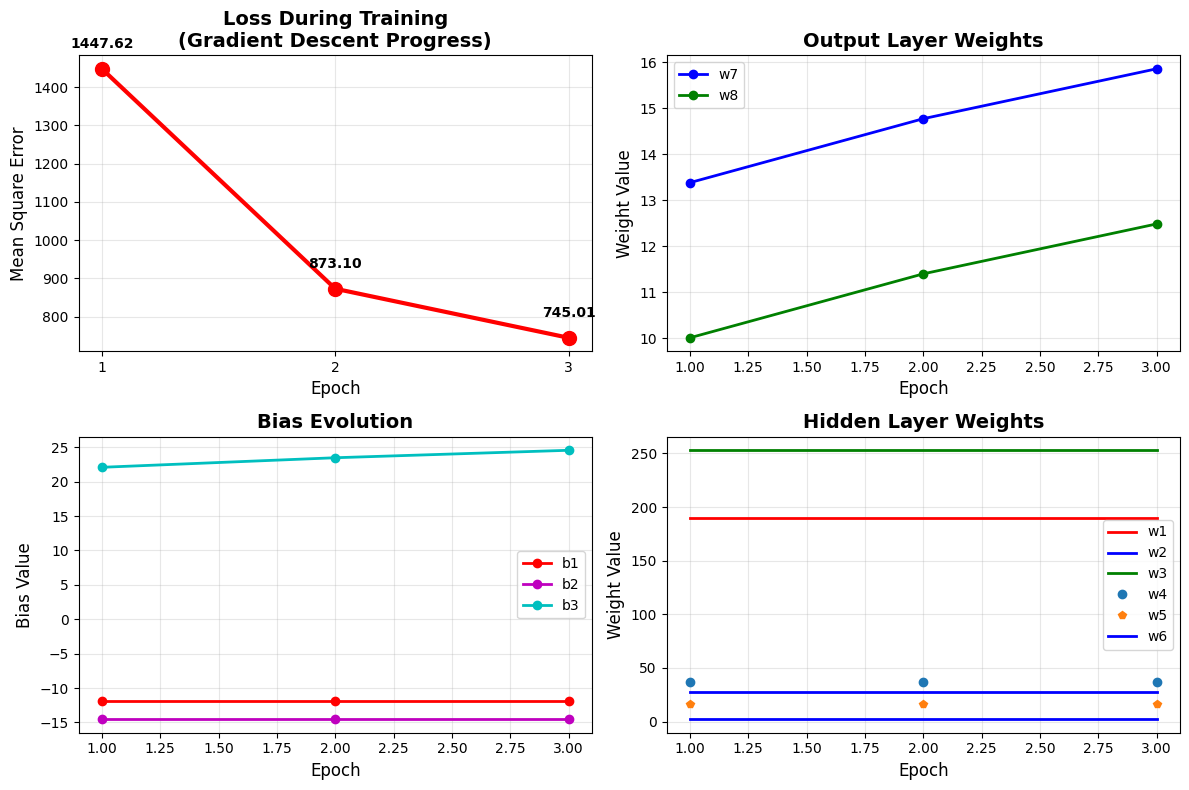

In [19]:
# Plot gradient descent progress
plt.figure(figsize=(12, 8))

# Loss plot
plt.subplot(2, 2, 1)
plt.plot(range(1, epochs + 1), loss_history, 'ro-', linewidth=3, markersize=10)
plt.title('Loss During Training\n(Gradient Descent Progress)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Square Error', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, epochs + 1))
for i, loss in enumerate(loss_history):
    plt.annotate(f'{loss:.2f}', (i+1, loss), textcoords="offset points", 
                xytext=(0,15), ha='center', fontsize=10, fontweight='bold')

# Weight evolution plots
plt.subplot(2, 2, 2)
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, [h['w7'] for h in weight_history], 'b-o', label='w7', linewidth=2)
plt.plot(epochs_range, [h['w8'] for h in weight_history], 'g-o', label='w8', linewidth=2)
plt.title('Output Layer Weights', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Weight Value', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.plot(epochs_range, [h['b1'] for h in weight_history], 'r-o', label='b1', linewidth=2)
plt.plot(epochs_range, [h['b2'] for h in weight_history], 'm-o', label='b2', linewidth=2)
plt.plot(epochs_range, [h['b3'] for h in weight_history], 'c-o', label='b3', linewidth=2)
plt.title('Bias Evolution', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Bias Value', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
hidden_weights = ['w1', 'w2', 'w3', 'w4', 'w5', 'w6']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
for i, weight in enumerate(hidden_weights):
    values = [h[weight] for h in weight_history]
    plt.plot(epochs_range, values, f'{colors[i][0]}', label=weight, linewidth=2)
plt.title('Hidden Layer Weights', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Weight Value', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
# Final predictions and analysis
print("\n🎯 FINAL PREDICTIONS AND ANALYSIS:")
print("=" * 60)

total_error = 0
for i, (x1, x2, x3, target) in enumerate(zip(X[:, 0], X[:, 1], X[:, 2], ya)):
    # Forward pass with final weights
    z1 = w1*x1 + w3*x2 + w5*x3 + b1
    z2 = w2*x1 + w4*x2 + w6*x3 + b2
    g1 = sigmoid(z1)
    g2 = sigmoid(z2)
    yp = w7*g1 + w8*g2 + b3
    
    error = abs(target - yp)
    total_error += error
    
    print(f"Student {i+1}: Actual={target:2d}, Predicted={yp:6.2f}, Error={error:5.2f}")
    print(f"           z1={z1:6.2f}, z2={z2:6.2f}, g1={g1:6.4f}, g2={g2:6.4f}")

avg_error = total_error / len(X)
print(f"\nAverage Absolute Error: {avg_error:.2f}")
print(f"Final Loss: {loss_history[-1]:.4f}")

print("\n📋 PARTIAL DERIVATIVES EXPLANATION:")
print("=" * 50)
print("The chain rule allows us to compute gradients by breaking down")
print("the derivative of the loss function with respect to each weight:")
print("")
print("For output weights:")
print("∂L/∂w7 = ∂L/∂yp × ∂yp/∂w7 = ∂L/∂yp × g1")
print("∂L/∂w8 = ∂L/∂yp × ∂yp/∂w8 = ∂L/∂yp × g2")
print("")
print("For hidden weights (using chain rule):")
print("∂L/∂w1 = ∂L/∂yp × ∂yp/∂g1 × ∂g1/∂z1 × ∂z1/∂w1")
print("       = ∂L/∂yp × w7 × g1×(1-g1) × x1")
print("")
print("This allows gradient descent to update all weights simultaneously")
print("to minimize the loss function.")


🎯 FINAL PREDICTIONS AND ANALYSIS:
Student 1: Actual=81, Predicted= 52.90, Error=28.10
           z1=31690.25, z2=4566.13, g1=1.0000, g2=1.0000
Student 2: Actual=94, Predicted= 52.90, Error=41.10
           z1=32354.73, z2=4662.68, g1=1.0000, g2=1.0000
Student 3: Actual=45, Predicted= 52.90, Error= 7.90
           z1=23548.05, z2=3388.88, g1=1.0000, g2=1.0000
Student 4: Actual=43, Predicted= 52.90, Error= 9.90
           z1=21855.79, z2=3144.21, g1=1.0000, g2=1.0000

Average Absolute Error: 21.75
Final Loss: 745.0098

📋 PARTIAL DERIVATIVES EXPLANATION:
The chain rule allows us to compute gradients by breaking down
the derivative of the loss function with respect to each weight:

For output weights:
∂L/∂w7 = ∂L/∂yp × ∂yp/∂w7 = ∂L/∂yp × g1
∂L/∂w8 = ∂L/∂yp × ∂yp/∂w8 = ∂L/∂yp × g2

For hidden weights (using chain rule):
∂L/∂w1 = ∂L/∂yp × ∂yp/∂g1 × ∂g1/∂z1 × ∂z1/∂w1
       = ∂L/∂yp × w7 × g1×(1-g1) × x1

This allows gradient descent to update all weights simultaneously
to minimize the loss 